In [2]:
!pip install natpy

  Using cached NatPy-0.1.1-py3-none-any.whl (8.6 kB)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import natpy as nat

In [4]:
#conversion functions

def tesla2keV(n):
    return nat.convert(n * nat.T, (nat.keV)**2)

def keVtocm(lst):
    newLst = [x * 1.973269804593025e-08 for x in lst]
    return newLst

def keVtom(lst):
    newLst = [x * 1.973269804593025e-10 for x in lst]
    return newLst

def keVtomm(lst):
    newLst = [x * 1.973269804593025e-7 for x in lst]
    return newLst

def keVtos(lst):
    newLst = [x * 6.582119569509067e-19 for x in lst]
    return newLst

def keVtoHz(lst):
    newLst = [x * 1.519267447878626e+18 for x in lst]
    return newLst

def keVtoJoules(lst):
    newLst = [x * 1.602176634e-16 for x in lst]
    return newLst

def keVtos2(number):
    number = number * 6.582119569509067e-19
    return number


#def seconds2keV(number):
 
    #number = nat.convert(number * nat.s, (1/nat.keV)) 
    
print(tesla2keV(500))
print(keVtos2(1.0*10**8))

0.09767638561432755 keV2
6.582119569509067e-11


/tmp/ipykernel_24/148953778.py:58: RuntimeWarning: invalid value encountered in sqrt
  betaUpdate = np.sqrt(1-(1/gammaUpdate)**2)


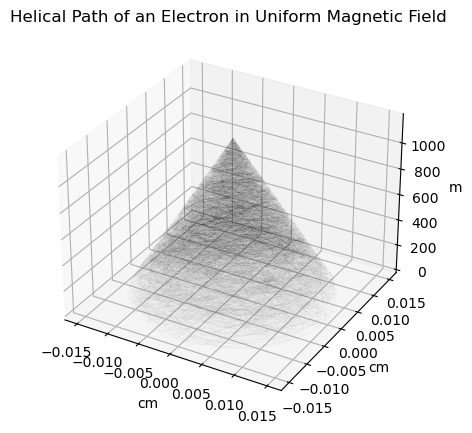

In [26]:
eTotalEnergy = 105000 #keV

eRestMass = 511 #keV

gamma = eTotalEnergy/eRestMass #unitless

beta = np.sqrt(1-(1/gamma)**2) #unitless

theta = np.pi/4

betaPerp = beta*np.sin(theta) #unitless
betaParallel = beta*np.cos(theta) #unitless

magField = 0.09767638561432755 #keV^2 (1000 tesla)
omega = magField/(gamma * eRestMass) #keV
helixRadius = betaPerp/omega #1/keV

def helicalPath():
    x_coor = []
    y_coor = []
    z_coor = []
    time = 0
    x,y,z = 0, 0, 0
    
    radiusUpdate = helixRadius
    omegaUpdate = omega
    gammaUpdate = gamma
    betaUpdate = beta
    betaPerpUpdate = betaPerp
    initial_energy = eTotalEnergy
    
    while(initial_energy > 0):
        
        #print('loop')
        dt = 1.0*10**9#1/keV
        power = ((2*omegaUpdate**2)/3) * (betaPerpUpdate**2/(1-betaUpdate**2)) #keV^2
        emitted_radiation = power * dt #keV
        
        delta_x = radiusUpdate * np.sin(omegaUpdate * time)
        delta_y = radiusUpdate * np.cos(omegaUpdate * time)
        delta_z = betaParallel * time
        
        v_x = omegaUpdate * radiusUpdate * np.cos(omegaUpdate * time)
        v_y = -omegaUpdate * radiusUpdate * np.sin(omegaUpdate * time)
        delta_vx = omegaUpdate * v_y
        delta_vy = omegaUpdate * v_x
        
        #UPDATES
        time += dt
        x_coor.append(x + delta_x)
        y_coor.append(y + delta_y)
        z_coor.append(z + delta_z)
        v_x += delta_vx
        v_y += delta_vy
        
        initial_energy = initial_energy - emitted_radiation
        gammaUpdate = initial_energy/eRestMass
        betaUpdate = np.sqrt(1-(1/gammaUpdate)**2)
        betaPerpUpdate = np.sqrt(v_x**2 + v_y**2)
        omegaUpdate = magField/(gammaUpdate * eRestMass)
        radiusUpdate = betaPerpUpdate/omegaUpdate
        
        if keVtocm([delta_x])[0]/keVtos2(dt) > 3*10**8:
            print('VIOLATION: exceeds speed of light')
            break
        if emitted_radiation < 11:
            break
            
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(keVtocm(x_coor),keVtocm(y_coor),keVtocm(z_coor), s = .1)
    ax.plot(keVtocm(x_coor),keVtocm(y_coor),keVtom(z_coor), color = 'black',linewidth = 0.008)
    ax.set_zlabel('m')
    plt.title('Helical Path of an Electron in Uniform Magnetic Field')
    plt.xlabel('cm')
    plt.ylabel('cm')
    
helicalPath()
        

